Situation:

    70% more agent availability on week days as weekends
    Shift requirements normal distribution around 5 nurses/shift
    Beta = 0.8

Task:

    Evaluate Shift Coverage over Nurse availability starting from 0 to 5times shift requirements


In [1]:
import abm_scheduling
from abm_scheduling import Schedule as Schedule
from abm_scheduling import Nurse as Nurse

In [2]:
import time
from datetime import datetime

import abm_scheduling.Log
from abm_scheduling.Log import Log as Log

import matplotlib.pylab as plt
%matplotlib inline

log = Log()

## Nurse availability on number of nurses

In [4]:
beta = 0.8
p_to_accept_negative_change = .001
degree_of_agent_availability = 0.7
min_number_of_runs_with_shift_coverage_1 = 3
number_of_runs_with_shift_coverage_1 = 0
works_weekends = True
num_nurses_per_shift = 5

In [6]:
num_nurses = 0
nurses = []
run_results = []

schedule = Schedule(num_nurses_needed=num_nurses_per_shift, is_random=True)
model = abm_scheduling.NSP_AB_Model()

    
while number_of_runs_with_shift_coverage_1 < min_number_of_runs_with_shift_coverage_1:
    nurse = Nurse(id_name=num_nurses)
    nurse.generate_shift_preferences(degree_of_agent_availability=0.7, works_weekends=True)
    nurses.append(nurse)
    num_nurses += 1
    
    start_time = datetime.today()
    
    results = model.run(schedule_org=schedule,
                       nurses_org=nurses,
                       beta=beta,
                       p_to_accept_negative_change=p_to_accept_negative_change,
                       utility_function_parameters=None,
                       print_stats=False)
    run_results.append(results)

    end_time = datetime.today()
    log.print_elapsed_time(start_time,end_time)

    if results.shift_coverage >= 1:
        number_of_runs_with_shift_coverage_1 += 1

Start:  2019-06-16 20:56:04.024160
End:  2019-06-16 20:56:05.443713
Elapsed time: 00:00:01
Start:  2019-06-16 20:56:05.445698
End:  2019-06-16 20:56:07.595363
Elapsed time: 00:00:02
Start:  2019-06-16 20:56:07.595860
End:  2019-06-16 20:56:10.928036
Elapsed time: 00:00:03
Start:  2019-06-16 20:56:10.928735
End:  2019-06-16 20:56:15.761315
Elapsed time: 00:00:04
Start:  2019-06-16 20:56:15.762023
End:  2019-06-16 20:56:21.827661
Elapsed time: 00:00:06
Start:  2019-06-16 20:56:21.827661
End:  2019-06-16 20:56:29.434519
Elapsed time: 00:00:07
Start:  2019-06-16 20:56:29.435476
End:  2019-06-16 20:56:38.810871
Elapsed time: 00:00:09
Start:  2019-06-16 20:56:38.811366
End:  2019-06-16 20:56:49.920828
Elapsed time: 00:00:11
Start:  2019-06-16 20:56:49.921292
End:  2019-06-16 20:57:02.606034
Elapsed time: 00:00:12
Start:  2019-06-16 20:57:02.606534
End:  2019-06-16 20:57:17.078500
Elapsed time: 00:00:14
Start:  2019-06-16 20:57:17.078988
End:  2019-06-16 20:57:33.505526
Elapsed time: 00:00:16

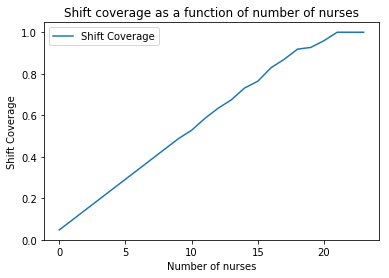

In [8]:
plt.figure()
plt.plot(range(num_nurses), [r.shift_coverage for r in run_results], label="Shift Coverage")
plt.title(f'Shift coverage as a function of number of nurses')
plt.xlabel("Number of nurses")
plt.ylabel("Shift Coverage")
plt.legend()
plt.show()